<a href="https://colab.research.google.com/github/sagihaider/Biogas_Prediction/blob/master/DeepLearning_MISO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/Biogas_Prediction.git 

import pandas as pd
import numpy as np

Cloning into 'Biogas_Prediction'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 327 (delta 2), reused 46 (delta 1), pack-reused 275
Receiving objects: 100% (327/327), 72.29 MiB | 35.10 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [4]:
data = pd.read_excel('/content/Biogas_Prediction/Data/Gasification Data_Daya.xlsx', index_col=0, header=0)
data = data.iloc[1:223,:14] 
display(list(data.columns.values))

['C [%wt db]',
 'H [%wt db]',
 'O [%wt db]',
 'Moisture [%wt]',
 'Ash [%wt db]',
 'ER [-]',
 'T [ºC]',
 'Bed material',
 'Steam/Biomass',
 'H2 [%vol N2 free]',
 'CO [%vol N2 free]',
 'CO2 [%vol N2 free]',
 'CH4 [%vol N2 free]',
 'GY [Nm3/kg daf]']

In [5]:
# Drop null balues and store dataframe in dataframe 2
data=data.dropna()
print(data)

#Check Null values again after removing
print(data.isnull().values.any())
print(data.isna().values.any())

X_all = data.iloc[:, :9]
y_all = data.iloc[:, 9:]

        C [%wt db] H [%wt db]  ...  CH4 [%vol N2 free] GY [Nm3/kg daf]
Sr No.                         ...                                    
2            50.00        5.7  ...            6.474820        2.500000
3            50.00        5.7  ...            7.164179        2.500000
4            50.00        5.7  ...            6.474820        2.100000
5            50.00        5.7  ...            6.474820        2.400000
6            50.00        5.7  ...            8.181818        2.100000
...            ...        ...  ...                 ...             ...
219          46.85        6.3  ...            9.706147        0.947532
220          46.85        6.3  ...            9.455065        0.975752
221          46.76       5.68  ...            9.933682        0.971784
222          46.76       5.68  ...            8.778402        0.982989
223          46.76       5.68  ...            8.534014        0.973816

[187 rows x 14 columns]
False
False


In [14]:
from sklearn.preprocessing import normalize
input_columns = list(X_all.columns.values)
input_columns = [i.split(' [', 1)[0] for i in input_columns]
output_columns = list(y_all.columns.values)
output_columns = [i.split(' [', 1)[0] for i in output_columns]
print(input_columns, output_columns)

Xnorm = normalize(X_all, 'l2', axis=1)
ynorm = normalize(y_all, 'l2', axis=1)

# Create MISO
X = Xnorm
y = ynorm[:,2]

['C', 'H', 'O', 'Moisture', 'Ash', 'ER', 'T', 'Bed material', 'Steam/Biomass'] ['H2', 'CO', 'CO2', 'CH4', 'GY']


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.33)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history =  model.fit(Xnorm, y, epochs=150, batch_size=10, validation_split = 0.2, verbose=1)

Epoch 1/150
15/15 [==============================] - 1s 22ms/step - loss: 0.6669 - accuracy: 0.0000e+00 - val_loss: 0.6353 - val_accuracy: 0.0000e+00
Epoch 2/150
15/15 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.0000e+00 - val_loss: 0.6332 - val_accuracy: 0.0000e+00
Epoch 3/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.0000e+00 - val_loss: 0.6316 - val_accuracy: 0.0000e+00
Epoch 4/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.0000e+00 - val_loss: 0.6308 - val_accuracy: 0.0000e+00
Epoch 5/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6645 - accuracy: 0.0000e+00 - val_loss: 0.6325 - val_accuracy: 0.0000e+00
Epoch 6/150
15/15 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.0000e+00 - val_loss: 0.6328 - val_accuracy: 0.0000e+00
Epoch 7/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.0000e+00 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


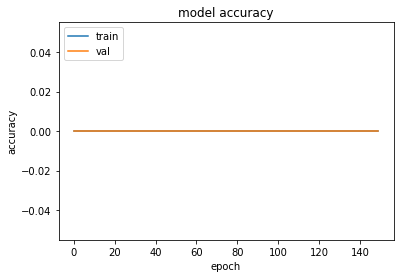

In [13]:
import matplotlib.pyplot as plt
print(history.history.keys())
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()